# 처방기록 중 관심약품 필터링

In [1]:
# 라이브러리를 불러옵니다.
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

## 데이터 추출 (항우울제)
항우울제로 사용되는 약물들만 추출하도록 하겠습니다.

In [2]:
# 항우울제 매핑 데이터를 불러옵니다.
ad_mapping = pd.read_csv('data/antidepressant_mapping_v2.csv', encoding='utf-8')
MI_codes = ad_mapping['MI_code'].values
ATC_codes = ad_mapping['ATC_code'].unique()

2017년도 데이터

In [3]:
# 데이터의 구조를 확인합니다.
pd.read_csv('./raw_data/2017/국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', nrows=3)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2017,1,340428,1,1,15,31,20170629,131801ATB,1.0,3,10,15.0,450,20181126
1,2017,1,340428,2,1,15,31,20170629,172101ATB,1.0,3,10,16.0,480,20181126
2,2017,1,340428,3,1,15,31,20170629,193302ATB,1.0,3,10,98.0,2940,20181126


2018년도 데이터

In [4]:
# 데이터의 구조를 확인합니다.
pd.read_csv('raw_data/2018/NHIS_OPEN_T60_2018_PART1.csv', encoding='cp949', nrows=3)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회투약량,1일투약량,총투여일수,단가,금액,데이터공개일자
0,2018,1,18610814,1,1,6,28,20180130,101430ATR,2.0,3,3,51.0,918,20191217
1,2018,1,43905715,3,1,6,28,20180816,240301ATB,1.0,3,2,135.0,810,20191217
2,2018,1,43905715,2,1,6,28,20180816,222801ATB,1.0,2,2,270.0,1080,20191217


2019년도 데이터

In [5]:
pd.read_csv('./raw_data/2019/T60_2019_1백만.1.csv', encoding='cp949', nrows=3).head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2019,1,103911229,3,1,2,41,20190225,101842AGN,0.6667,3,3,90.0,540,20201222
1,2019,1,103911229,1,1,2,41,20190225,244330ASY,7.0000,3,3,15.0,945,20201222
2,2019,1,103911229,2,1,2,41,20190225,183135ASY,8.0000,3,3,20.0,1440,20201222


2020년도 데이터

In [6]:
pd.read_csv('./raw_data/2020/HP_T60_2020_1.CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,2021-12-29
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,2021-12-29
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,2021-12-29


In [7]:
# 모든 파일에서 주성분코드 리스트에 있는 주성분코드가 포함된 행만 추출합니다.
for year in range(2017, 2021):  # 2017~2020년 데이터를 읽어옵니다.
    rows = []
    for file in os.listdir(f'./raw_data/{year}'):  # 모든 파일을 읽어옵니다.
        for chunk in pd.read_csv(f'./raw_data/{year}/' + file, encoding='cp949', chunksize=100000):
            rows.append(chunk[chunk['약품일반성분명코드'].isin(MI_codes)])
    pd.concat(rows).to_csv(f'./data/antidepressant_prescription_{year}.csv', index=False)

KeyboardInterrupt: 

2021년도 데이터 (주의: 컬럼명 다름)

In [ ]:
pd.read_csv('raw_data/2021/국민건강보험공단_의약품처방정보_01_20211231.csv', encoding='cp949', nrows=3).head()

,STND_Y,IDV_ID,KEY_SEQ,SEQ_NO,SEX,AGE_GROUP,SIDO,RECU_FR_DT,GNL_NM_CD,DD_MQTY_FREQ,DD_EXEC_FREQ,MDCN_EXEC_FREQ,UN_COST,AMT,DATA_STD_DT
0,2021,628074,9261,1,2,13,41,2021-09-13,347701ACH,1.0,1,3,521.0,1563,2022-08-11
1,2021,730013,13348,1,2,13,41,2021-02-17,493801ATB,1.0,1,3,534.0,1602,2022-08-11
2,2021,97734,16827,1,2,13,41,2021-06-10,374602ATB,1.0,1,3,469.0,1407,2022-08-11


In [68]:
rows = []
for file in os.listdir(f'./raw_data/2021'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2021/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['GNL_NM_CD'].isin(MI_codes)])
pd.concat(rows).to_csv(f'./data/antidepressant_prescription_2021.csv', index=False)

2022년도 데이터 (주의: 성분명코드 변환)

In [27]:
pd.read_csv('raw_data/2022/국민건강보험공단_의약품처방정보_2022_1(수정).CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자일련번호,처방내역일련번호,약품일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드(ATC코드),1회투약량,1일투약량,총투여일수
0,2022,278817,5270722,1,2,13,41,2022-03-04,M01AE,1.0,3,3
1,2022,132289,13021551,1,2,13,41,2022-03-23,M01AE,1.0,3,3
2,2022,151731,10392393,1,2,13,41,2022-04-18,M01AE,1.0,3,3


In [30]:
rows = []
for file in os.listdir(f'./raw_data/2022'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2022/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['약품일반성분명코드(ATC코드)'].str[:4] == 'N06A'])
pd.concat(rows).to_csv('./data/antidepressant_prescription_2022.csv', index=False)

In [ ]:
df_2022 = pd.read_csv('./data/antidepressant_prescription_2022.csv')
len(df_2022)

12662

2023년도 데이터

In [68]:
pd.read_csv('raw_data/2023/1.국민건강보험공단_의약품처방정보_2023_1.CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자일련번호,처방내역일련번호,약품일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드(ATC코드),1회투약량,1일투약량,총투여일수
0,2023,170188,13890231,1,2,4,41,2023-01-09,2229A,1.0,3,3
1,2023,322493,4188428,1,2,4,41,2023-01-03,2229A,1.0,3,3
2,2023,223677,6819879,1,2,4,41,2023-07-12,2229A,1.0,3,3


2023년도 데이터는 주성분코드에서 변형된 코드를 사용합니다.

주성분코드의 첫 4자리와 7번째자리의 숫자를 합쳐 만든 코드입니다.

In [38]:
ad_mapping['MI_code_short'] = ad_mapping['MI_code'].str[:4] + ad_mapping['MI_code'].str[6]
MI_codes_short = ad_mapping['MI_code_short'].unique()

In [22]:
rows = []
for file in os.listdir(f'./raw_data/2023'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2023/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['약품일반성분명코드(ATC코드)'].isin(MI_codes_short)])
pd.concat(rows).to_csv('./data/antidepressant_prescription_2023.csv', index=False)

---
## ATC 코드로 통일화

In [8]:
# 모든 데이터를 같이 불러옵니다.
df_2017 = pd.read_csv('./data/antidepressant_prescription_2017.csv')
df_2018 = pd.read_csv('./data/antidepressant_prescription_2018.csv')
df_2019 = pd.read_csv('./data/antidepressant_prescription_2019.csv')
df_2020 = pd.read_csv('./data/antidepressant_prescription_2020.csv')
df_2021 = pd.read_csv('./data/antidepressant_prescription_2021.csv')
# df_2022 = pd.read_csv('./data/antidepressant_prescription_2022.csv')
# df_2023 = pd.read_csv('./data/antidepressant_prescription_2023.csv')

In [9]:
for df in zip([df_2017, df_2018, df_2019, df_2020, df_2021], [2017, 2018, 2019, 2020, 2021]):
    print(f'{df[1]}년도 데이터: {len(df[0])}건')

2017년도 데이터: 205686건
2018년도 데이터: 212869건
2019년도 데이터: 231136건
2020년도 데이터: 257946건
2021년도 데이터: 276131건


### 매핑 진행

In [ ]:
# 17, 18, 19, 20, 21년도의 주성분코드를 ATC코드로 변환합니다
columns = df_2017.columns
for df_year, year in zip([df_2017, df_2018, df_2019, df_2020, df_2021], ['2017', '2018', '2019', '2020', '2021']):
    df_year.columns = columns  # 컬럼명을 통일합니다.
    if year in ['2017', '2018', '2019']:
        df_year[['요양개시일자', '데이터 공개일자']] = df_year[['요양개시일자', '데이터 공개일자']].apply(pd.to_datetime, format='%Y%m%d')
    else:
        df_year[['요양개시일자', '데이터 공개일자']] = df_year[['요양개시일자', '데이터 공개일자']].apply(pd.to_datetime)
    df_year['요양개시일자'] = pd.to_datetime(df_year['요양개시일자'])
    df_year['ATC코드'] = df_year['약품일반성분명코드'].map(ad_mapping.set_index('MI_code')['ATC_code'])
    print(f"{year} 매핑 실패 개수: {df_year['ATC코드'].isnull().sum()}")
    # df_year.drop(['약품일반성분명코드', '단가', '금액', '데이터 공개일자'], axis=1, inplace=True)

2017 매핑 실패 개수: 0
2018 매핑 실패 개수: 0
2019 매핑 실패 개수: 0
2020 매핑 실패 개수: 0
2021 매핑 실패 개수: 0


In [42]:
# 년도별 데이터를 합칩니다.
df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183768 entries, 0 to 276130
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   기준년도         1183768 non-null  int64         
 1   가입자일련번호      1183768 non-null  int64         
 2   처방내역일련번호     1183768 non-null  int64         
 3   일련번호         1183768 non-null  int64         
 4   성별코드         1183768 non-null  int64         
 5   연령대코드(5세단위)  1183768 non-null  int64         
 6   시도코드         1183768 non-null  int64         
 7   요양개시일자       1183768 non-null  datetime64[ns]
 8   약품일반성분명코드    1183768 non-null  object        
 9   1회 투약량       1183768 non-null  float64       
 10  1일투약량        1183768 non-null  int64         
 11  총투여일수        1183768 non-null  int64         
 12  단가           1183768 non-null  float64       
 13  금액           1183768 non-null  int64         
 14  데이터 공개일자     1183768 non-null  datetime64[ns]
 15  ATC코드        1183768 

In [47]:
# 전체 데이터를 저장합니다
df.to_parquet('./data/antidepressant_prescription_all_years.parquet', index=False)

---
## EDA

In [2]:
# 데이터를 다시 불러옵니다
df = pd.read_parquet('./data/antidepressant_prescription_all_years.parquet')

2017년도 이후로 100만명의 샘플 중 항우울제를 처방받는 환자의 수의 변화를 시각화 해보겠습니다.

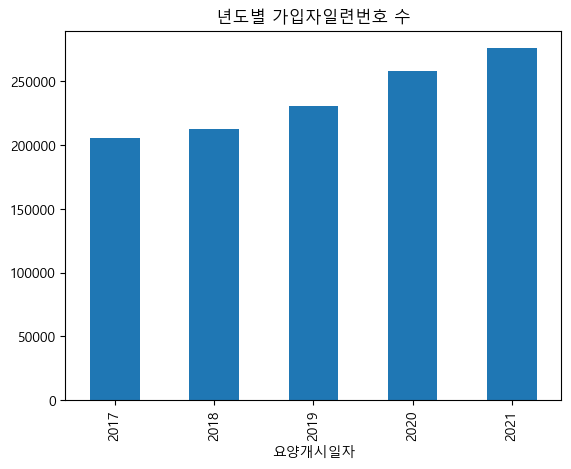

In [4]:
# 년도별 가입자일련번호 수를 시각화합니다.
df['요양개시일자'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('년도별 가입자일련번호 수')
plt.show()

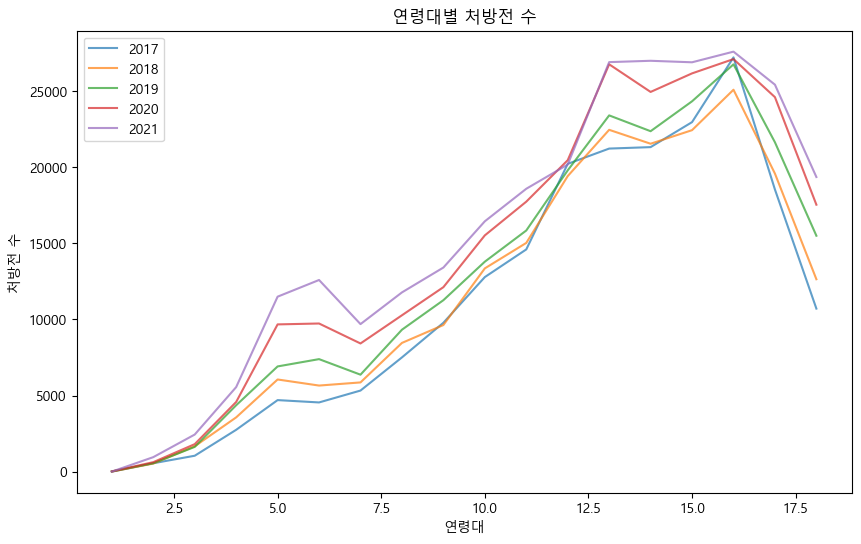

In [3]:
# 각 연령대별 처방전 수를 기준년도별로 시각화합니다
plt.figure(figsize=(10, 6))
for year in df['기준년도'].unique():
    df_year = df[df['기준년도'] == year]
    df_year.groupby('연령대코드(5세단위)')['처방내역일련번호'].count().plot(kind='line', alpha=0.7, label=year)
plt.title('연령대별 처방전 수')
plt.ylabel('처방전 수')
plt.xlabel('연령대')
plt.legend()
plt.show()

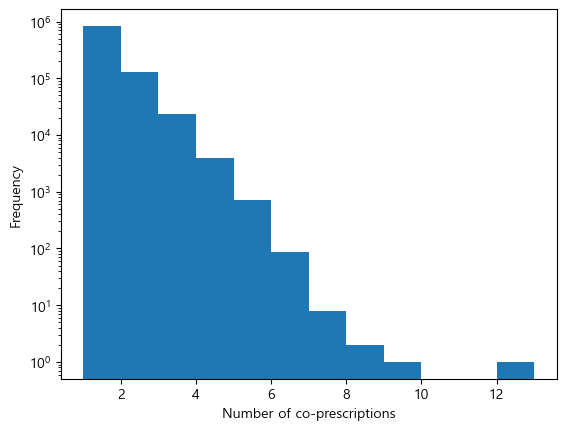

In [7]:
# 처방내역일련번호으로 그룹화하여 같이 처방된 약품의 개수를 세어봅니다.
prescription_counts = df.groupby('처방내역일련번호').size()

# 처방된 약품의 개수를 히스토그램으로 그립니다.
plt.hist(prescription_counts, bins=range(1, 14))
plt.xlabel('Number of co-prescriptions')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

---

### Part II

우울증 유무가 클러스터링 차이를 유발하는지

가설) 우울증 네트워크가 더 dense 할것이다. 우울증 환자들은
양쪽에서 같은 군을 비교하기 위해서 항우울제 처방내역을 기준으로 특정 횟수이상으로 처방된 약들만 고려. 

major 하게 같이 처방되는 애들만 골라서 보자
-> bias 있을수도 있다.


안되면 안되는대로 다른 특징

sbm 돌리는 부분. 애내들이 어떠한 형식의 네트워크인지 기본적인 설명
예) 가장 처방빈도가 높은 약물이 뭐가 있는지 간략하게 설명, (어떤 병)
그이후로 가설검정

antidepressant_prescription2021에 pid 기반으로 2021 년도 우울증 환자 처방내역 뽑아서 모든약물들 나열한다음에 처방횟수기준으로 자르기 + 우울증 약물 제거. 
gephi로 시각화.

이 약물들에 대해서 (2021) 돌아가서 이 약물들에 대한 처방내역을 뽑아온다. 

n명 파악.

In [11]:
df_2021.head()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
0,2021,856296,1707917,1,2,13,41,2021-09-28,495501ACE,1.0,1,3,363.0,1089,2022-08-11,N06AX21
1,2021,454748,3323987,1,2,13,41,2021-01-25,242901ACH,1.0,1,3,40.0,120,2022-08-11,N06AX05
2,2021,251575,764386,1,2,13,41,2021-09-13,196204ATB,1.0,1,30,448.0,13440,2022-08-11,N06AX11
3,2021,235148,2654234,1,2,13,41,2021-10-13,107501ATB,1.0,1,30,23.0,690,2022-08-11,N06AA09
4,2021,524895,3529380,1,2,13,41,2021-10-01,209305ATR,1.0,1,30,729.0,21870,2022-08-11,N06AB05


In [15]:
# 항우울제가 처방된 처방전의 리스트를 만듭니다.
ad_prescriptions = df_2021['처방내역일련번호'].unique()

In [13]:
pd.read_csv('raw_data/2021/국민건강보험공단_의약품처방정보_01_20211231.csv', encoding='cp949', nrows=3).head()

,STND_Y,IDV_ID,KEY_SEQ,SEQ_NO,SEX,AGE_GROUP,SIDO,RECU_FR_DT,GNL_NM_CD,DD_MQTY_FREQ,DD_EXEC_FREQ,MDCN_EXEC_FREQ,UN_COST,AMT,DATA_STD_DT
0,2021,628074,9261,1,2,13,41,2021-09-13,347701ACH,1.0,1,3,521.0,1563,2022-08-11
1,2021,730013,13348,1,2,13,41,2021-02-17,493801ATB,1.0,1,3,534.0,1602,2022-08-11
2,2021,97734,16827,1,2,13,41,2021-06-10,374602ATB,1.0,1,3,469.0,1407,2022-08-11


In [16]:
# 원본 데이터에서 해당되는 처방전을 추출합니다.
rows = []
for chunk in pd.read_csv('./raw_data/2021/국민건강보험공단_의약품처방정보_01_20211231.csv', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['KEY_SEQ'].isin(ad_prescriptions)])
for chunk in pd.read_csv('./raw_data/2021/국민건강보험공단_의약품처방정보_02_20211231.csv', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['KEY_SEQ'].isin(ad_prescriptions)])
for chunk in pd.read_csv('./raw_data/2021/국민건강보험공단_의약품처방정보_03_20211231.csv', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['KEY_SEQ'].isin(ad_prescriptions)])

# 추출한 행을 합칩니다.
df_ad_pres_2021 = pd.concat(rows)

In [73]:
# 추출한 데이터에 null 값이 있는지 확인합니다.
print(df_ad_pres_2021.isnull().sum())

# 데이터에 중복된 행이 있는지 확인합니다.
print("중복된 행의 수:", df_ad_pres_2021.duplicated().sum())

# null 값이 있는 행을 제거합니다.
df_full = df_ad_pres_2021.dropna()

STND_Y             0
IDV_ID             0
KEY_SEQ            0
SEQ_NO             0
SEX                0
AGE_GROUP          0
SIDO               0
RECU_FR_DT         0
GNL_NM_CD         47
DD_MQTY_FREQ       0
DD_EXEC_FREQ       0
MDCN_EXEC_FREQ     0
UN_COST            0
AMT                0
DATA_STD_DT        0
dtype: int64
중복된 행의 수: 0


In [ ]:
mapping = pd.read_csv('data/mapping/mapping.csv', encoding='utf-8')

In [ ]:
# 하나의 주성분코드_9가 여러 ATC코드에 매핑되어 있는지 확인합니다.
mapping['ATC코드'].nunique() == mapping['주성분코드_9'].nunique()

# 여러 ATC코드에 매핑되어 있는 주성분코드_9를 가진 행을 찾습니다.
multi_mapped = mapping[mapping.duplicated(subset='주성분코드_9', keep=False)].sort_values('주성분코드_9')
non_multi_mapped = mapping[~mapping.duplicated(subset='주성분코드_9', keep=False)].sort_values('주성분코드_9')

# csv 파일로 저장합니다.
multi_mapped.to_csv('data/mapping/multi_mapped.csv', index=False)

# 수기로 수정된 매핑 데이터를 불러옵니다.
multi_mapped_edited = pd.read_csv('data/mapping/multi_mapped_edited.csv', encoding='cp949')

# Use 컬럼이 1인 행만 사용합니다.
multi_mapped_edited = multi_mapped_edited[multi_mapped_edited['Use'] == 1]
multi_mapped_edited.drop('Use', axis=1, inplace=True)
multi_mapped_edited.columns = mapping.columns

# 수정된 데이터를 기존 데이터에 반영합니다.
mapping_n = pd.concat([non_multi_mapped, multi_mapped_edited]).sort_values('주성분코드_9')

# 수정된 데이터를 저장합니다.
mapping_n.to_csv('data/mapping.csv', index=False)

In [74]:
df_full = df_full.copy()
df_full.columns = df_2017.columns[:-1]
df_full[['요양개시일자', '데이터 공개일자']] = df_full[['요양개시일자', '데이터 공개일자']].apply(pd.to_datetime)
df_full['ATC코드'] = df_full['약품일반성분명코드'].map(mapping_n.set_index('주성분코드_9')['ATC코드'])
print(f"{year} 매핑 실패 개수: {df_full['ATC코드'].isnull().sum()}")

# 매칭되지 않은 데이터를 제거합니다.
df_full = df_full.dropna(subset=['ATC코드'])

2021 매핑 실패 개수: 972


In [66]:
# 추출한 데이터를 CSV 파일로 저장합니다.
df_full.to_csv('./data/prescription_with_ad_2021.csv', index=False)

In [75]:
print(f"2017년 항우울제 처방환자 수: {df_full['가입자일련번호'].nunique()}명")

2017년 항우울제 처방환자 수: 52159명


In [83]:
ad_mapping

,MI_code,ATC_code,ATC_name
0,107501ATB,N06AA09,amitriptyline
1,107502ATB,N06AA09,amitriptyline
2,107504ATB,N06AA09,amitriptyline
3,136301ACH,N06AA04,clomipramine
4,136302ACH,N06AA04,clomipramine
...,...,...,...
74,428301ATB,N06AB04,citalopram
75,521101ATD,N06AB10,escitalopram
76,521102ATD,N06AB10,escitalopram
77,628503ATB,N06AX26,vortioxetine


In [87]:
df_non_ad_medication = df_full[~df_full['ATC코드'].isin(ad_mapping['ATC_code'].unique())]

205


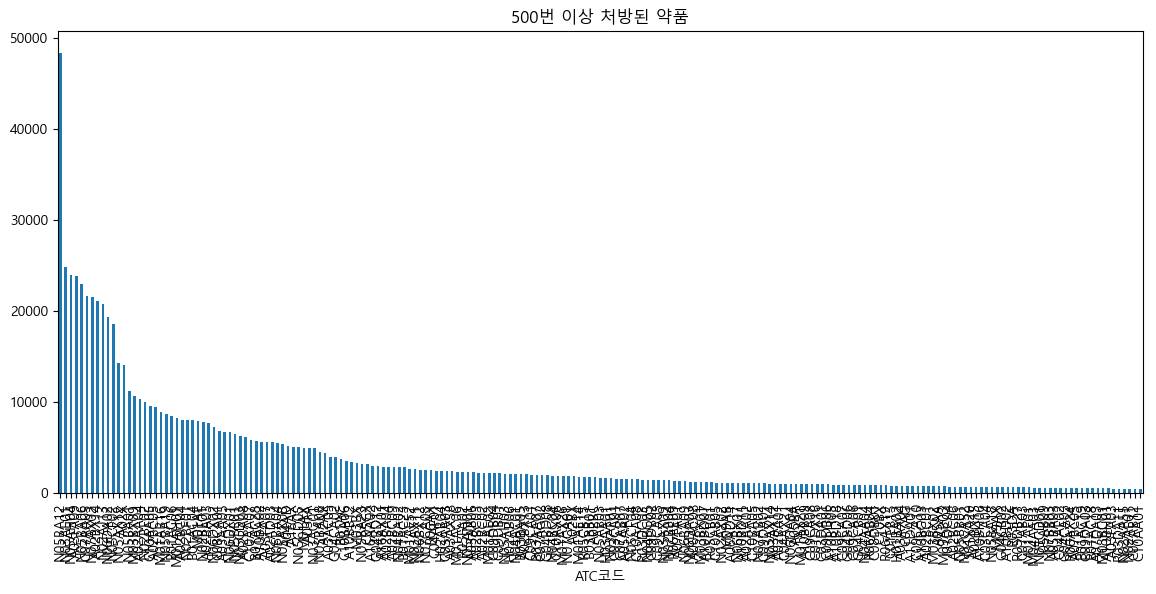

In [ ]:
# 500번 이상 처방된 약품
filter_n = 500

# 최소 횟수 이상 처방된 약품을 찾습니다.
interested_meds_list = df_non_ad_medication['ATC코드'].value_counts().loc[lambda x: x > filter_n].index
print(len(interested_meds_list))

# 최소 횟수 이상 처방된 약품을 시각화합니다.
plt.figure(figsize=(14, 6))
df_non_ad_medication['ATC코드'].value_counts().loc[lambda x: x > filter_n].plot(kind='bar')
plt.title(f'{filter_n}번 이상 처방된 약품')
plt.show()

In [ ]:
# N으로 시작하는 ATC 코드를 가진 데이터의 수를 확인합니다.
interested_meds_list.str.startswith('N').sum()

# N으로 시작하는 ATC 코드를 가진 데이터를 제외한 데이터를 추출합니다.

54

In [97]:
df_non_ad_medication['ATC코드'].value_counts()

ATC코드
N05BA12    48336
N03AE01    24881
N05AH04    23925
A03FA09    23887
N05BA06    22970
           ...  
L02BG03        1
J01MA15        1
D01AE23        1
R02AD          1
S01EA03        1
Name: count, Length: 782, dtype: int64